In [1]:
import tensorflow as tf
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import pydaddy

# Initialize integrator keywords for solve_ivp to replicate the odeint defaults
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12


| Mx range                       :  (-0.9, 0.358) |
| Mx mean                        :     -0.102     |
| My range                       :  (-0.566, 1.1) |
| My mean                        :     -0.001     |
| |M| range                      : (0.003, 1.102) |
| |M| mean                       :      0.281     |
| Autocorr time (Mx, My, |M^2|)  :  (84, 50, 83)  |
| (Dt, dt)                       :     (1, 1)     |



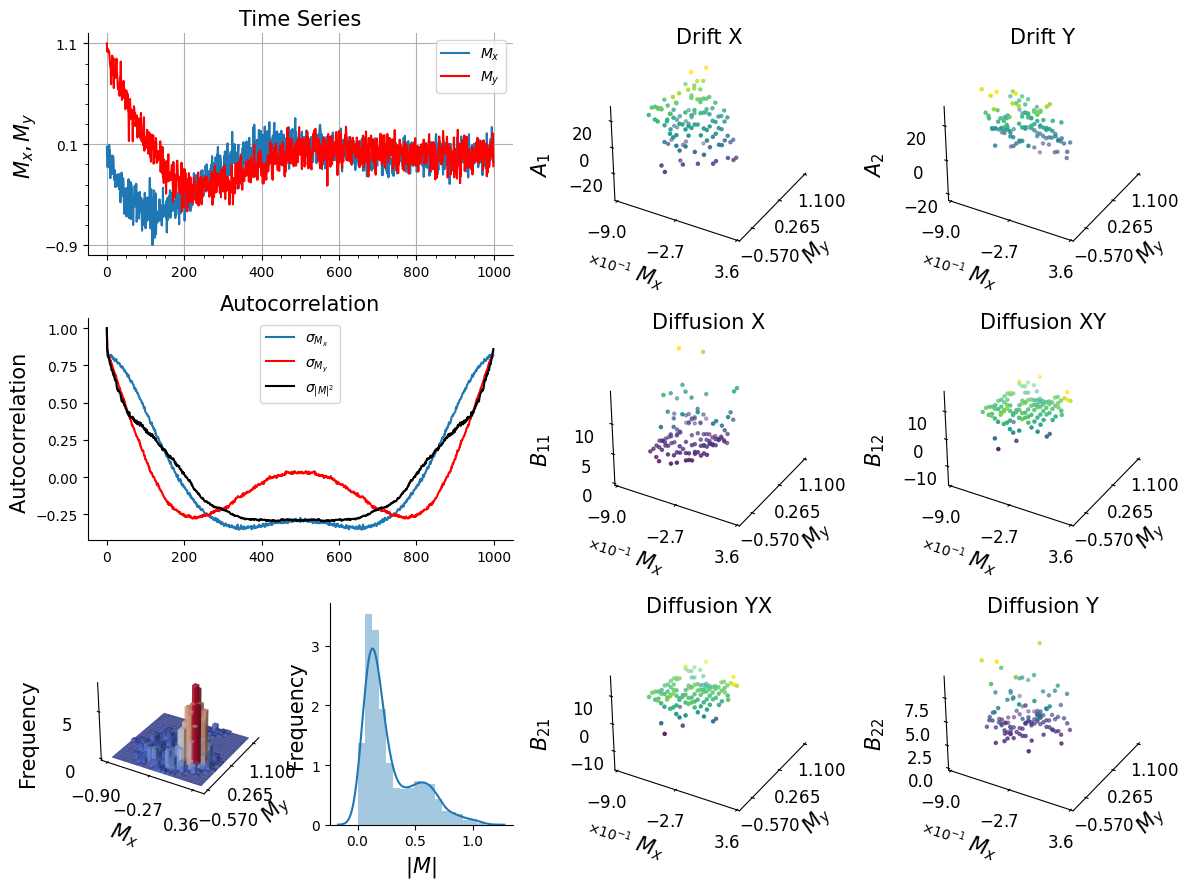

In [2]:
# Generate measurement data
dt = .01

t_train = np.arange(0, 10, dt)
x0_train = [0, 1]
t_train_span = (t_train[0], t_train[-1])
dim = 2
multiple = True

def van_der_pol(t, x, p=[1]):
    return [-x[1],  x[0] - p[0] * (1 - x[0] ** 2) * x[1]]

# (1000,2)
x_train = solve_ivp(fun = van_der_pol, 
            t_span = t_train_span, y0 = x0_train, t_eval=t_train,
             **integrator_keywords).y.T

x_train = x_train + np.random.normal(0 ,0.1, (x_train.shape[0], x_train.shape[1]))

ddsde = pydaddy.Characterize([x_train[:,0], x_train[:,1]], t=t_train, bins =20)

In [3]:
A1 = ddsde.fit('A1', order=3, tune=True)
A2 = ddsde.fit('A2', order=3, tune=True)
B11 = ddsde.fit('B11', order=3, tune=True)
B22 = ddsde.fit('B22', order=3, tune=True)
B21 = ddsde.fit('B21', order=3, tune=True)
for i in [A1, A2, B11, B22, B21]:
    print(i)
    print('--'*30)

(3.142 ± 0.563) + (-33.354 ± 3.542)x + (-185.212 ± 15.460)x^2 + (-223.404 ± 22.562)x^3 + (-4.503 ± 3.421)y + (44.892 ± 17.591)xy + (51.328 ± 33.898)x^2y + (-63.252 ± 9.121)y^2 + (-132.040 ± 21.207)xy^2 + (54.371 ± 10.646)y^3
------------------------------------------------------------
0
------------------------------------------------------------
(1.485 ± 0.123) + (1.231 ± 0.771)x + (15.360 ± 3.367)x^2 + (12.785 ± 4.914)x^3 + (-3.408 ± 3.831)xy + (2.806 ± 1.986)y^2 + (12.318 ± 4.618)xy^2 + (-2.266 ± 2.319)y^3
------------------------------------------------------------
(1.678 ± 0.121) + (2.399 ± 3.310)x^2 + (2.377 ± 4.830)x^3 + (1.593 ± 0.732)y + (-4.854 ± 3.766)xy + (-14.457 ± 7.257)x^2y + (7.765 ± 1.953)y^2 + (10.460 ± 4.540)xy^2 + (-9.913 ± 2.279)y^3
------------------------------------------------------------
0
------------------------------------------------------------


| Mx range                       :  (-0.9, 0.358) |
| Mx mean                        :     -0.102     |
| My range                       :  (-0.566, 1.1) |
| My mean                        :     -0.001     |
| |M| range                      : (0.003, 1.102) |
| |M| mean                       :      0.281     |
| Autocorr time (Mx, My, |M^2|)  :  (84, 50, 83)  |
| (Dt, dt)                       :     (1, 1)     |

Drift (A1): (3.142 ± 0.563) + (-33.354 ± 3.542)x + (-185.212 ± 15.460)x^2 + (-223.404 ± 22.562)x^3 + (-4.503 ± 3.421)y + (44.892 ± 17.591)xy + (51.328 ± 33.898)x^2y + (-63.252 ± 9.121)y^2 + (-132.040 ± 21.207)xy^2 + (54.371 ± 10.646)y^3
Drift (A2): 0
Diffusion (B11): (1.485 ± 0.123) + (1.231 ± 0.771)x + (15.360 ± 3.367)x^2 + (12.785 ± 4.914)x^3 + (-3.408 ± 3.831)xy + (2.806 ± 1.986)y^2 + (12.318 ± 4.618)xy^2 + (-2.266 ± 2.319)y^3
Diffusion (B22): (1.678 ± 0.121) + (2.399 ± 3.310)x^2 + (2.377 ± 4.830)x^3 + (1.593 ± 0.732)y + (-4.854 ± 3.766)xy + (-14.457 ± 7.257)x^2y + (7.765 ±

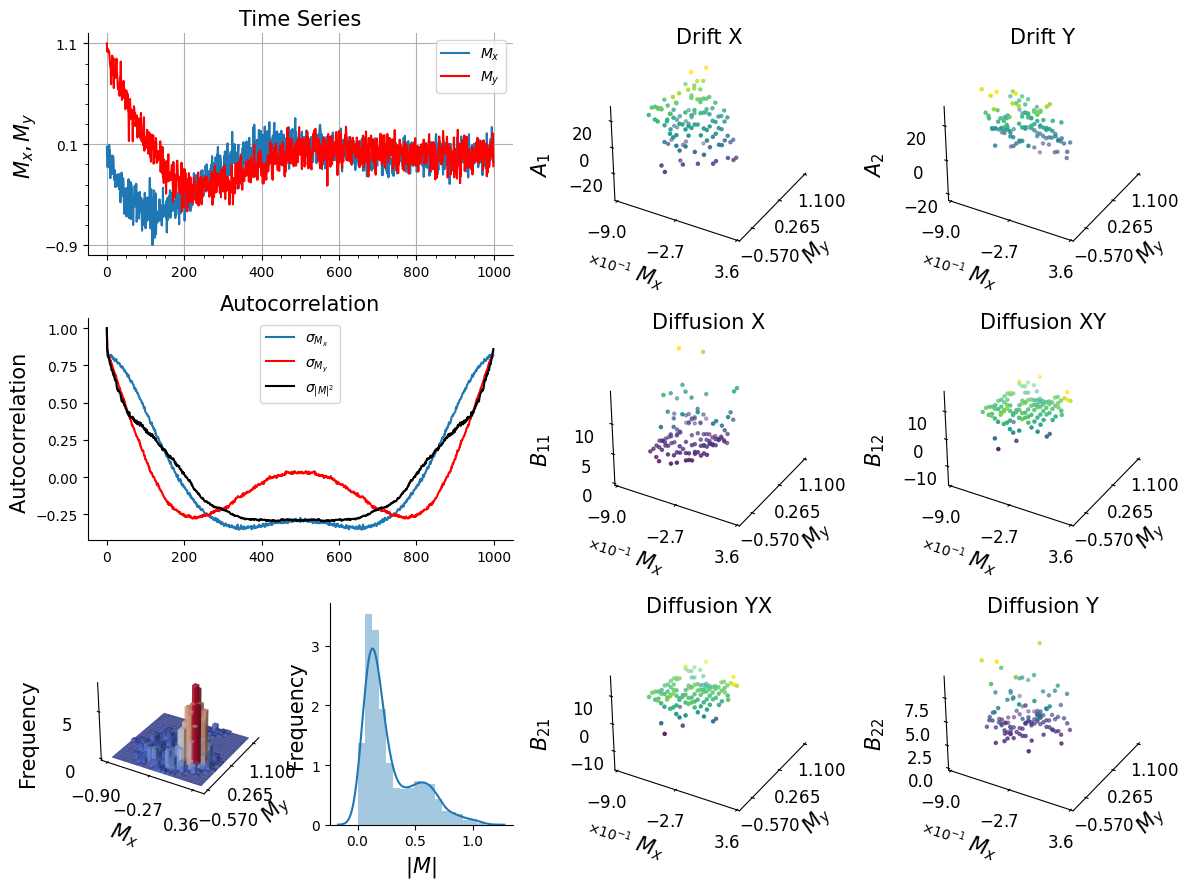

In [4]:
ddsde.summary()

Noise statistics:
Mean: (0.7035, 0.6402)
Correlation matrix:
    +1.0000    +0.2407
    +0.2407    +1.0000

Noise autocorrelation time:
    eta_x: 0.020 timesteps (0.000s)    eta_y: 0.011 timesteps (0.000s)


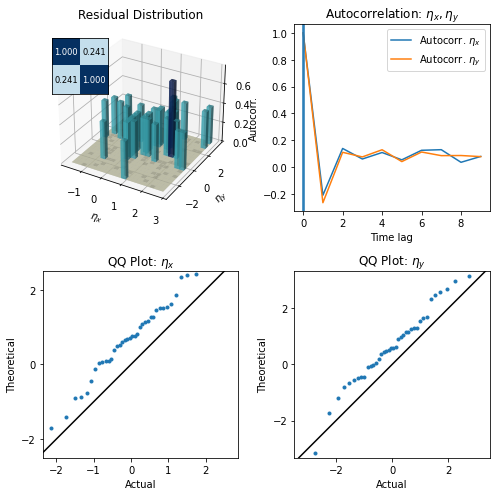

In [5]:
ddsde.noise_diagnostics()

In [6]:
ddsde.fit_diagnostics()


Drift:
 A1 = (3.142 ± 0.563) + (-33.354 ± 3.542)x + (-185.212 ± 15.460)x^2 + (-223.404 ± 22.562)x^3 + (-4.503 ± 3.421)y + (44.892 ± 17.591)xy + (51.328 ± 33.898)x^2y + (-63.252 ± 9.121)y^2 + (-132.040 ± 21.207)xy^2 + (54.371 ± 10.646)y^3
    Adjusted R-squared : -10.5118
    Adjusted R-squared (without outliers) : -11.9738

Drift:
 A2 = 0
    Adjusted R-squared : -0.0333
    Adjusted R-squared (without outliers) : -0.0396

Diffusion:
 B11 = (1.485 ± 0.123) + (1.231 ± 0.771)x + (15.360 ± 3.367)x^2 + (12.785 ± 4.914)x^3 + (-3.408 ± 3.831)xy + (2.806 ± 1.986)y^2 + (12.318 ± 4.618)xy^2 + (-2.266 ± 2.319)y^3
    Adjusted R-squared : -0.5232
    Adjusted R-squared (without outliers) : -0.5644

Diffusion:
 B22 = (1.678 ± 0.121) + (2.399 ± 3.310)x^2 + (2.377 ± 4.830)x^3 + (1.593 ± 0.732)y + (-4.854 ± 3.766)xy + (-14.457 ± 7.257)x^2y + (7.765 ± 1.953)y^2 + (10.460 ± 4.540)xy^2 + (-9.913 ± 2.279)y^3
    Adjusted R-squared : -6.9477
    Adjusted R-squared (without outliers) : -9.2644

Cross-diff

In [7]:
x_train + np.random.normal(loc = 0.0, scale = 0.1)

array([[ 6.85740614e-02,  1.09348301e+00],
       [-1.04250551e-01,  1.01213940e+00],
       [-1.32309193e-01,  1.03981066e+00],
       ...,
       [ 9.94599062e-04,  2.01661666e-01],
       [-7.09468588e-02,  1.58059551e-01],
       [-7.94618611e-02, -1.24517930e-01]])